# Data Exploration - Survey: Brightness Perception in Music Mastering 

## Imports

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load table with survey data and groundtruth

In [2]:
path = 'brightness_perception_survey_data.csv'
df = pd.read_csv(path)

# Renaming the index column as song
df = df.rename(columns = {'Unnamed: 0': 'song'})

# moving the 'song' column to the end - it's a bit weird in pandas
_df = df.song
df = df.drop(columns=['song', 'key'])
df['song'] = _df

# Sorting the df to have all songs in sorted order
#df = df.set_index('song')
df = df.sort_values(by = 'song').reset_index(drop=True)

In [3]:
df
# 64 rows, 8 rows for each song
# We have 8 songs, and we split each song into 2 test cases
# Since we have 3 condition sounds for each song, we get total 6 condition sounds
# 1 sound is reference in each test case, so total 2 reference sounds for each case

,0,1,2,3,4,5,6,7,8,9,10,11,db,sc,sc_delta,song
0,30,36,27,34,37,50,33,32,30,29,32,30,-2.00,933,-177,Classical_GustavHolst_01_1|C1
1,100,69,50,65,70,70,67,66,100,72,50,50,1.00,1222,112,Classical_GustavHolst_01_1|C2
2,0,30,32,20,33,30,13,30,0,12,18,10,-4.00,809,-301,Classical_GustavHolst_01_1|C3
3,50,50,50,50,50,50,50,48,50,50,50,50,0.00,1110,0,Classical_GustavHolst_01_1|reference
4,100,83,73,76,77,70,68,71,100,70,72,70,3.00,1498,388,Classical_GustavHolst_01_2|C1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,50,50,50,58,50,50,50,50,49,50,50,50,0.00,5481,0,Techno_PolarInertia_1|reference
60,100,81,70,85,79,100,91,50,100,91,67,90,4.00,7912,2432,Techno_PolarInertia_2|C1
61,70,63,71,66,56,70,66,69,71,70,59,70,1.00,6103,622,Techno_PolarInertia_2|C2
62,0,40,29,50,50,50,50,56,29,50,50,50,-0.25,5327,-153,Techno_PolarInertia_2|C3


This dataframe shows the 64 snippets - the participants have numbers 0-11, the groundtruth values are shown on the right
- db: the db change in the equalizer
- sc: the Spectral Centroid of the song snippet
- sc_delta: the difference of the spectral centroid in relation to the reference file

# JND Analysis

In [13]:
# Parameters for analysis
tests_per_song = 8
no_of_songs = 8
identity_lower_bound = 40
identity_upper_bound = 60
user_agreement_ratio = 0.75

# Values for plotting
lower_sc = []
lower_scd = []
lower_db = []
upper_sc = []
upper_scd = []
upper_db = []
song_name = []


for i in range(no_of_songs):
    # Storing Song Name
    song_title = df.song[i*tests_per_song].split('|')[0]
    song_name.append(song_title)

    # Dataframe Rows with Records for this song 
    df_chunk = df[i*tests_per_song:(i+1)*tests_per_song].sort_values(by = 'sc_delta')
    df_num = df_chunk.drop(columns = ['db', 'sc', 'sc_delta', 'song'])
    
    # Split test cases for positive and negative sc deltas
    df_lower = df_num[:tests_per_song//2]
    df_upper = df_num[tests_per_song//2:]
    

    # For this table, run two loops in two directions starting from centre
    # For lower side JND, Find the first row where median(or third quartile if 75%) is below 40
    # For upper side JND, Find the first row where median(or first quartile if 75%) is above 60    

    ###########
    ########### Calculate the third quartile for negative deltas
    ###########
    
    df_lower_75 = df_lower.quantile(q=user_agreement_ratio, axis=1)
    
    for i, v in df_lower_75.items():
        if v>identity_lower_bound:
            lower_sc.append(df_chunk.loc[i]['sc'])
            lower_scd.append(df_chunk.loc[i]['sc_delta'])
            lower_db.append(df_chunk.loc[i]['db'])
            break

#     for i, v in df_lower_75.items():
#         if v<=identity_lower_bound:
#             temp_sc = df_chunk.loc[i]['sc']
#             temp_scd = df_chunk.loc[i]['sc_delta']
#             temp_db = df_chunk.loc[i]['db']
#         if v>identity_lower_bound:
#             lower_sc.append(temp_sc)
#             lower_scd.append(temp_scd)
#             lower_db.append(temp_db)
#             break

    ###########
    ########### Calculate the third quartile for negative deltas
    ###########
    
    ###########
    ########### Calculate the first quartile for positive deltas
    ###########
    
    df_upper_25 = df_upper.quantile(q=1-user_agreement_ratio, axis=1)
    
    for i, v in df_upper_25.items():
        if v<identity_upper_bound:
            pass
            temp_sc = df_chunk.loc[i]['sc']
            temp_scd = df_chunk.loc[i]['sc_delta']
            temp_db = df_chunk.loc[i]['db']
        else:
            upper_sc.append(temp_sc)
            upper_scd.append(temp_scd)
            upper_db.append(temp_db)
            break

#     for i, v in df_upper_25.items():
#         if v>identity_upper_bound:
#             upper_sc.append(df_chunk.loc[i]['sc'])
#             upper_scd.append(df_chunk.loc[i]['sc_delta'])
#             upper_db.append(df_chunk.loc[i]['db'])
#             break

    ###########
    ########### Calculate the first quartile for positive deltas
    ###########

# Convert all to numpy arrays   
lower_sc = np.array(lower_sc)
upper_sc = np.array(upper_sc)
lower_scd = np.array(lower_scd)
upper_scd = np.array(upper_scd)
lower_db = np.array(lower_db)
upper_db = np.array(upper_db)
song_name = np.array(song_name)

In [14]:
# Find the increasing spectral centroid order
song_sc = upper_sc - upper_scd
sorted_order = song_sc.argsort()
print(sorted_order)

# Sort all arrays based on the increasing spectral centroid order
song_sc = song_sc[sorted_order]
lower_sc = lower_sc[sorted_order]
upper_sc = upper_sc[sorted_order]
lower_scd = lower_scd[sorted_order]
upper_scd = upper_scd[sorted_order]
lower_db = lower_db[sorted_order]
upper_db = upper_db[sorted_order]
song_name = song_name[sorted_order]

[0 1 6 2 5 3 4 7]


In [20]:
def plot_help(x, y, y_label, upper_y, upper_y_label, lower_y, lower_y_label, title, song_name, iflogx=False, iflogy=False):
    plt.figure(figsize = (15,15))
    
    plt.plot(x, upper_y, 'gx:', label=f"Positive {upper_y_label} at which 75 percent detected higher brightness")
    plt.errorbar(x, y, color='b', linestyle='-', marker='o', label="Original spectral centroid line with JND bars", yerr=np.vstack((y-lower_y, upper_y-y)))
    plt.plot(x, lower_y, 'rx:', label=f"Negative {lower_y_label} at which 75 percent detected lower brightness")

    for i,(x,y) in enumerate(zip(x, lower_y)):
        plt.annotate(xy=(x,y), text = song_name[i], fontsize=12)
    
    if iflogx:
        plt.xscale("log")
    plt.xticks(np.arange(1000,6000, step=500))
    plt.xlabel("Original Spectral Centroid of Song", fontsize=15)

    if iflogy:
        plt.yscale("log")
    plt.yticks(np.arange(1000,6000, step=500))
    plt.ylabel(y_label, fontsize=15)

    plt.title(title, fontsize=15)
    plt.legend()

    plt.savefig(f"/Users/anmolmishra/Desktop/{ title.replace(' ', '') }.png")
    plt.show()

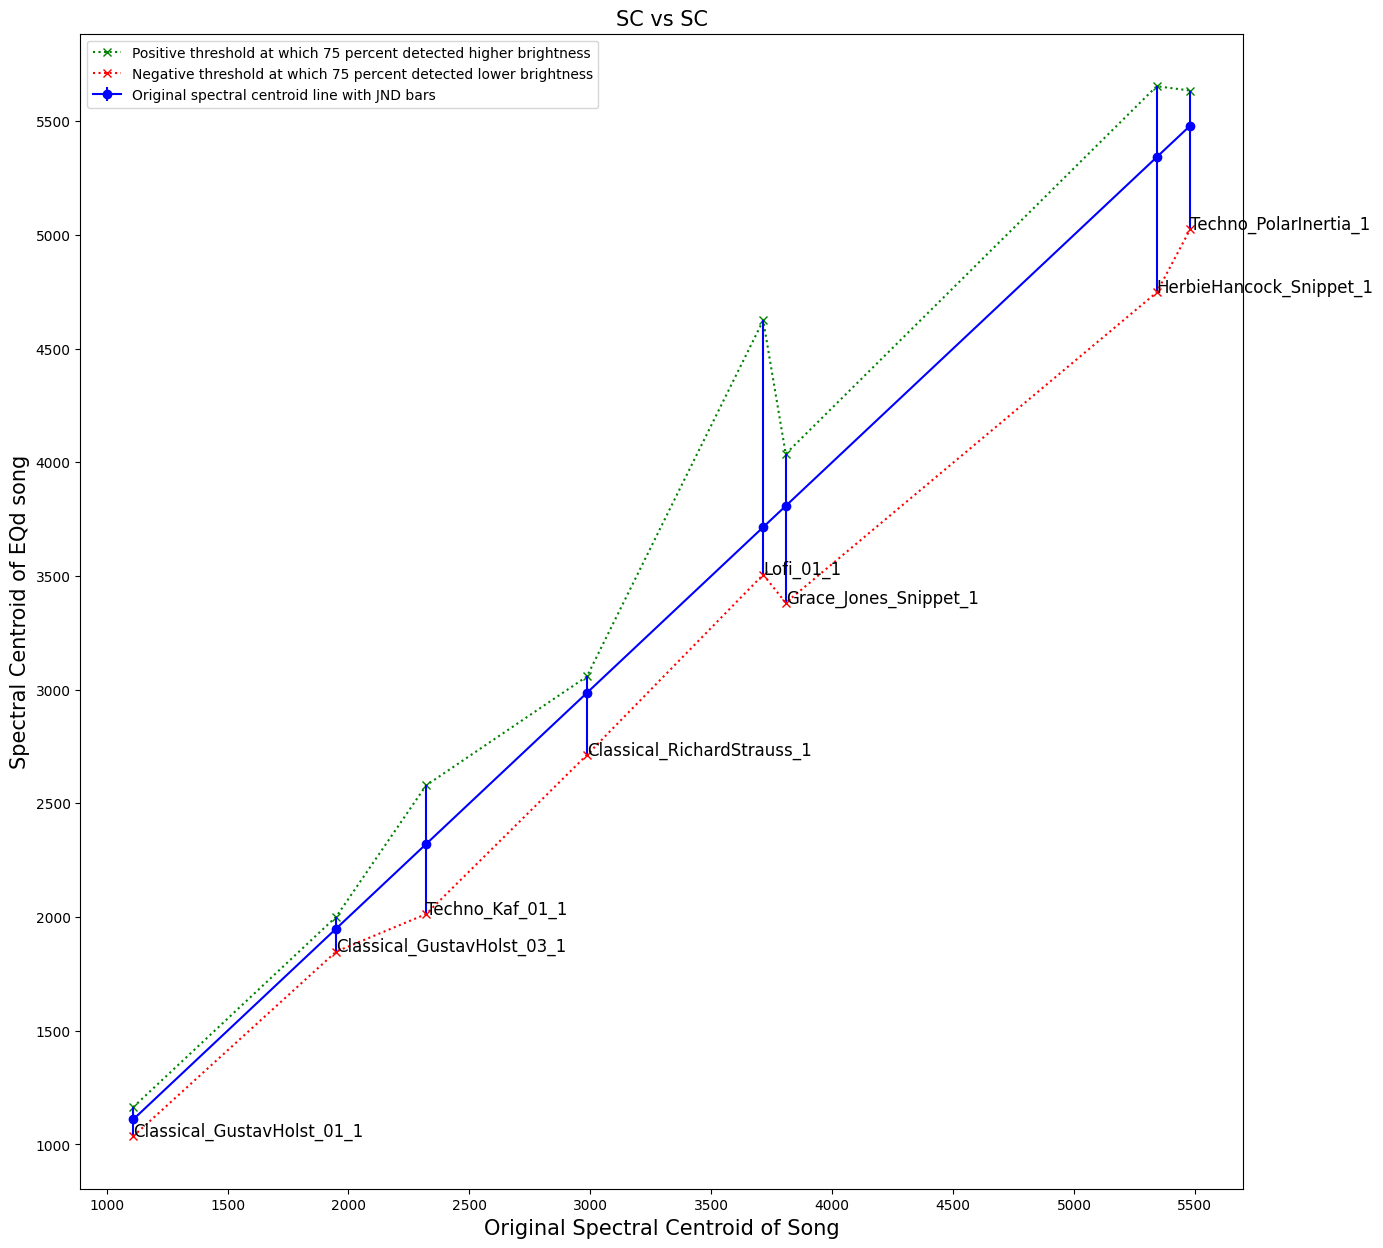

In [21]:
iflogx=False
iflogy=False
title="SC vs SC"

plot_help(song_sc, song_sc, "Spectral Centroid of EQd song", upper_sc, "threshold", lower_sc, \
          "threshold", title, song_name, iflogx, iflogy)

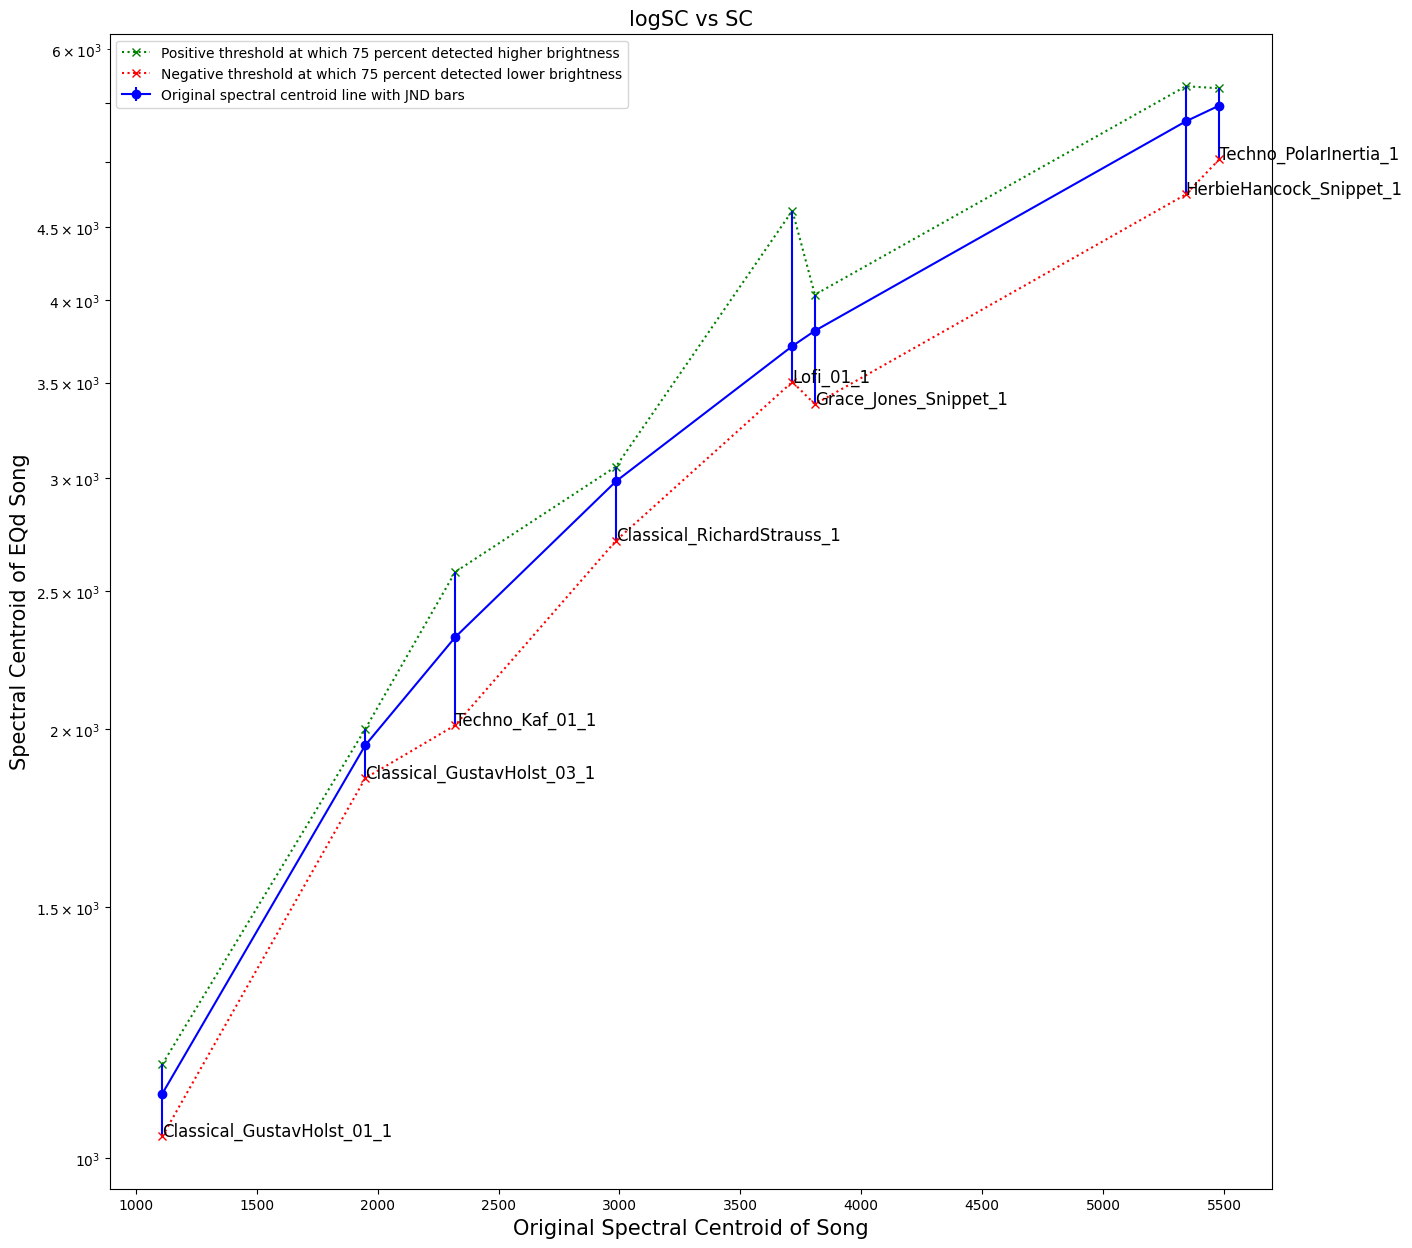

In [22]:
iflogx=False
iflogy=True
title="logSC vs SC"

plot_help(song_sc, song_sc, "Spectral Centroid of EQd Song", upper_sc, "threshold", lower_sc, \
          "threshold", title, song_name, iflogx, iflogy)

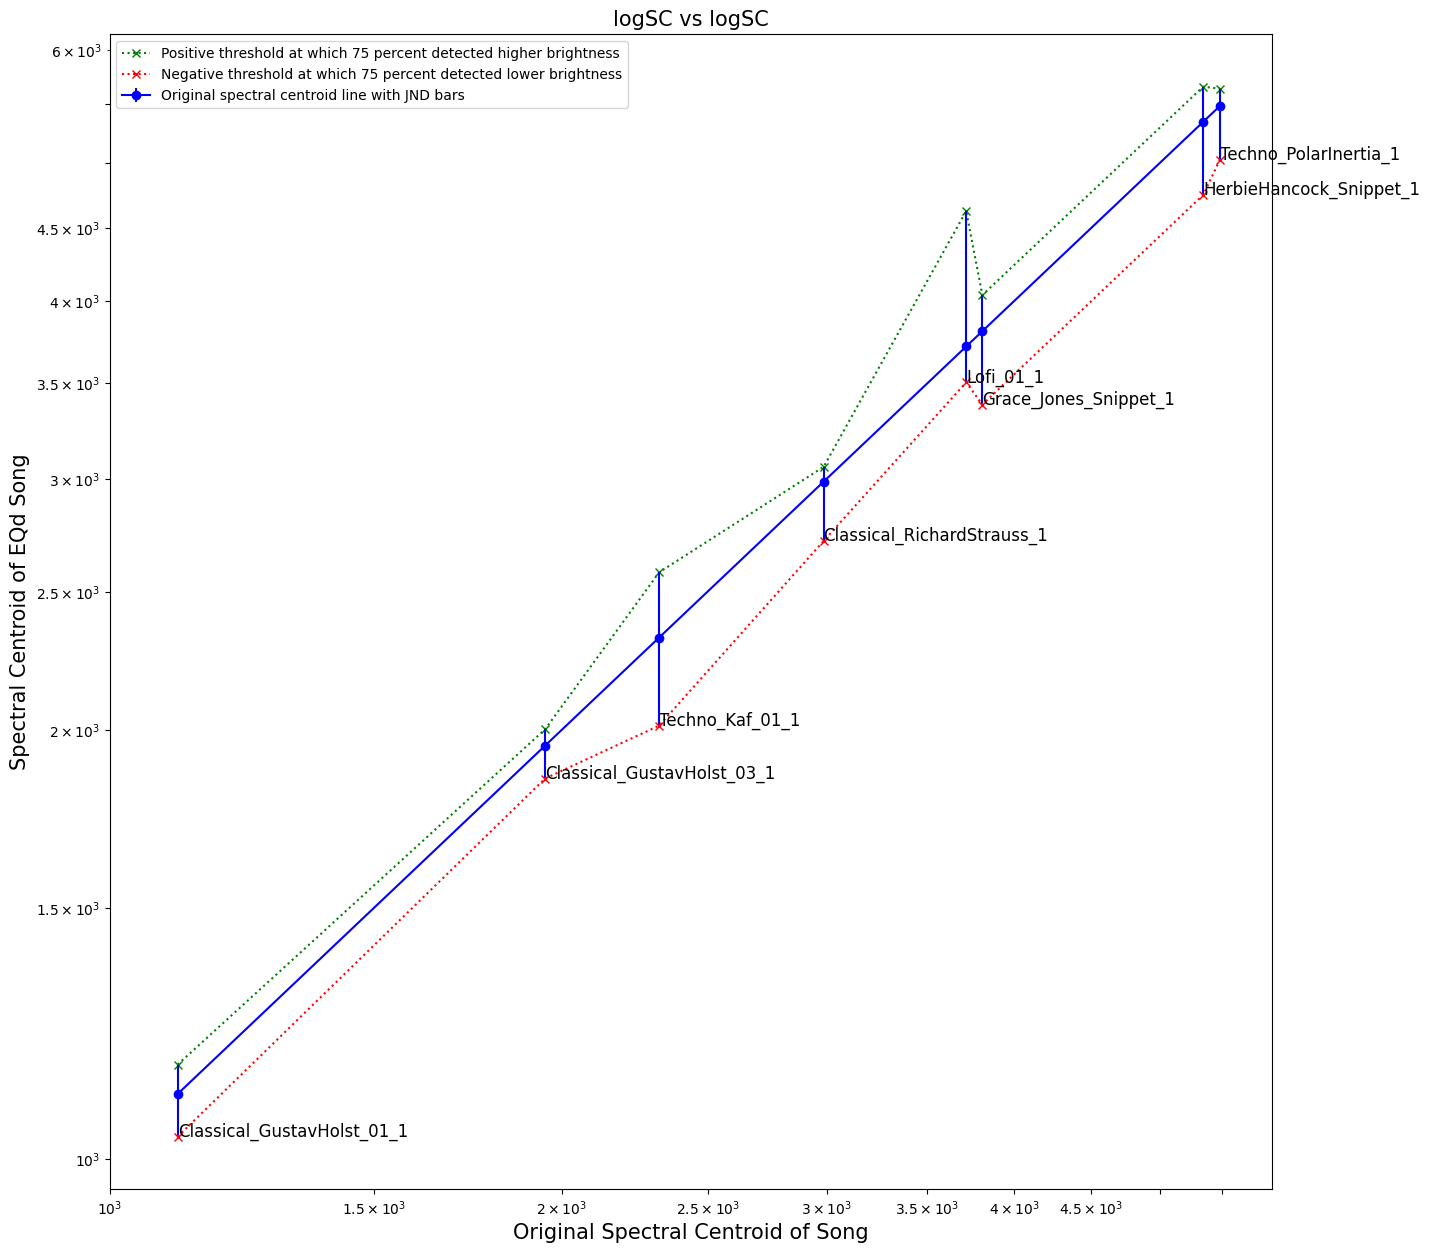

In [23]:
iflogx=True
iflogy=True
title="logSC vs logSC"

plot_help(song_sc, song_sc, "Spectral Centroid of EQd Song", upper_sc, "threshold", lower_sc, \
          "threshold", title, song_name, iflogx, iflogy)

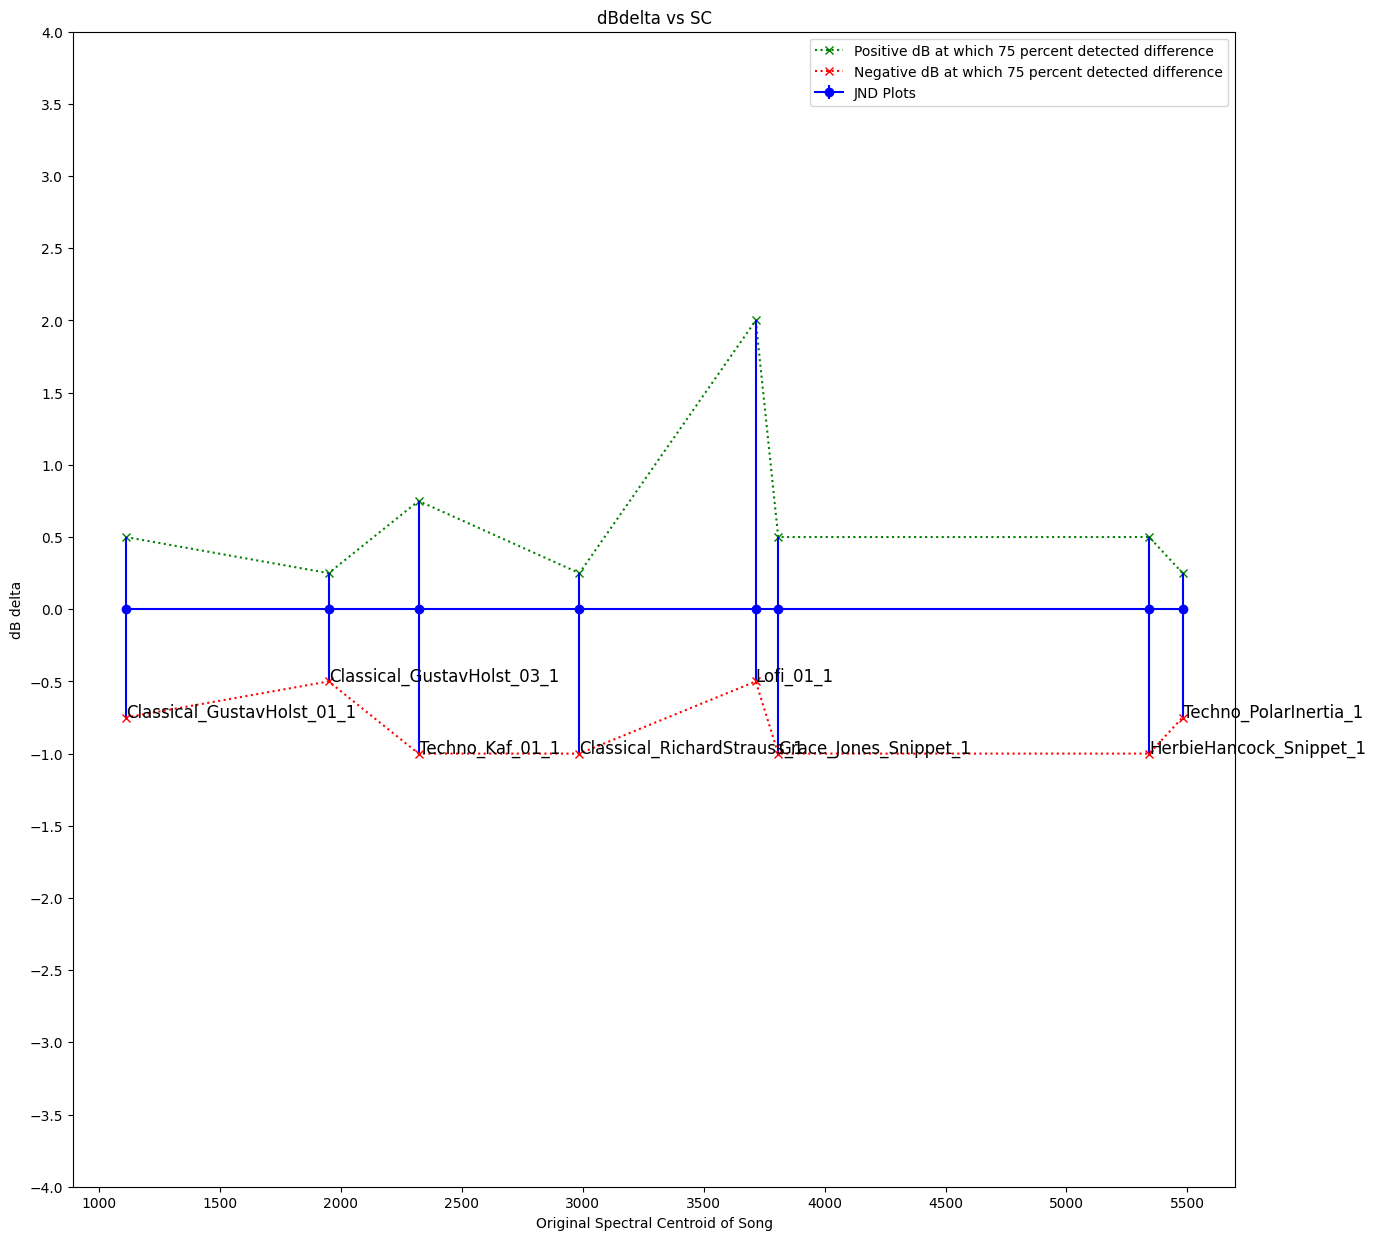

In [24]:
plt.figure(figsize = (15,15))

plt.plot(song_sc, upper_db, 'gx:', label="Positive dB at which 75 percent detected difference")
plt.errorbar(song_sc, np.zeros_like(song_sc), color='b', linestyle='-', marker='o', label="JND Plots", yerr=np.vstack((np.abs(lower_db), upper_db)))
plt.plot(song_sc, lower_db, 'rx:', label="Negative dB at which 75 percent detected difference")

for i,(x,y) in enumerate(zip(song_sc, lower_db)):
    plt.annotate(xy=(x,y), text = song_name[i], fontsize=12)

plt.xticks(np.arange(1000,6000, step=500))
plt.xlabel("Original Spectral Centroid of Song")

plt.yticks(np.arange(-4,4.5, step=0.5))
plt.ylabel("dB delta")

plt.title("dBdelta vs SC")
plt.legend()

plt.savefig("/Users/anmolmishra/Desktop/dBdeltavsSC.png")
plt.show()

# Songwise data exploration

- First: Let's check the mean rating per track and plot it with the Spectral Centroid Delta to see if there is an overall correlation between the mean perception and the delta

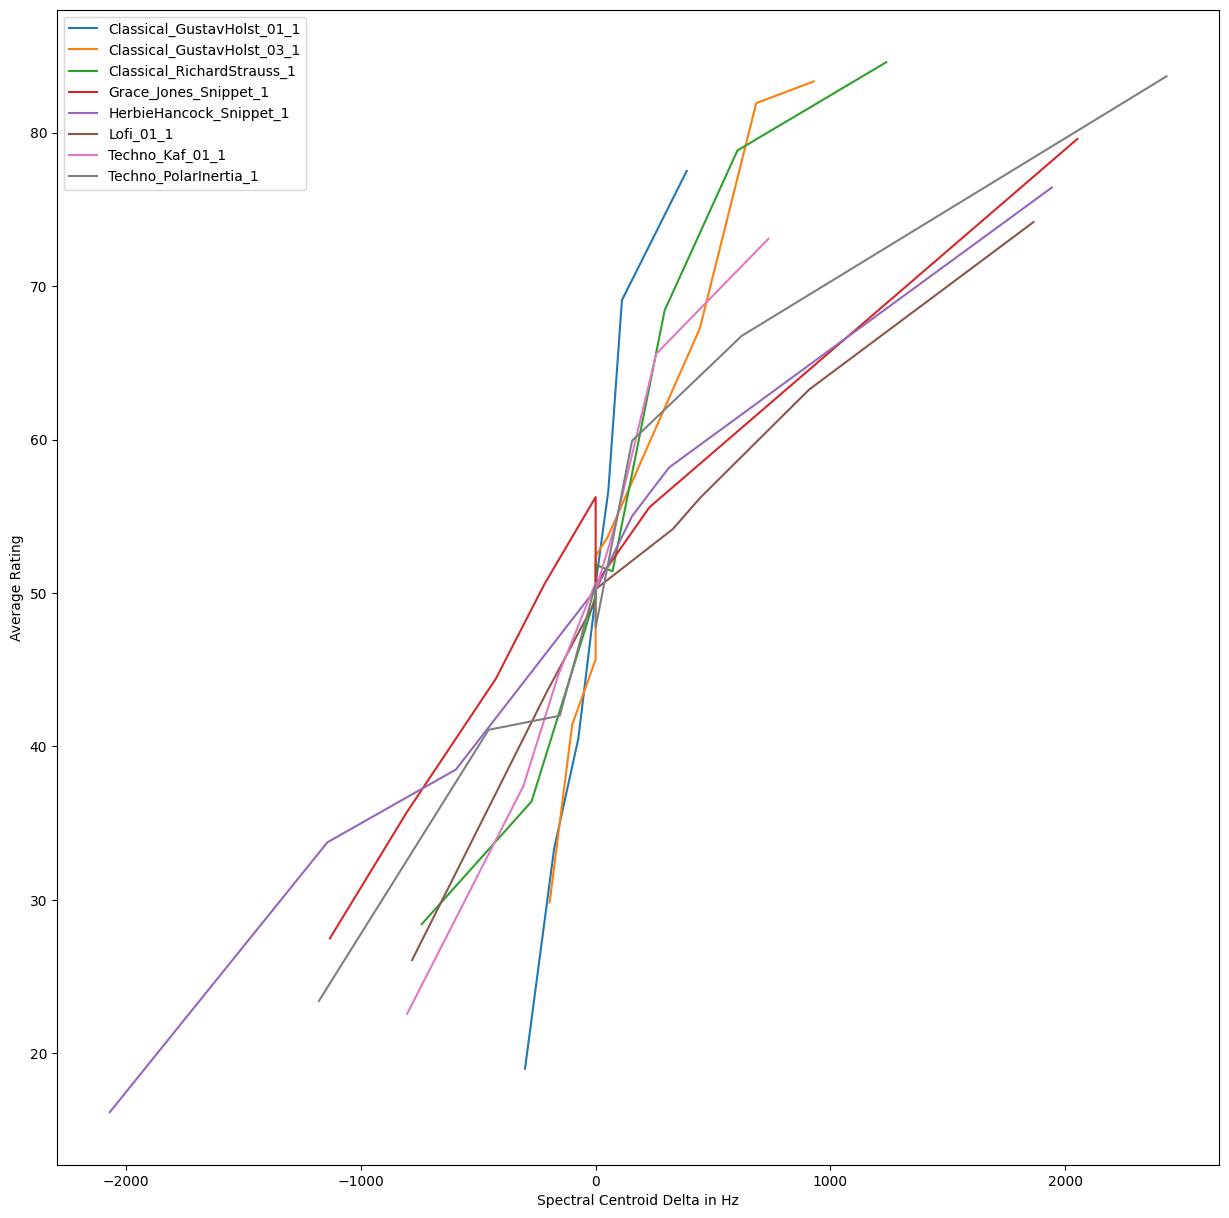

In [27]:
plt.figure(figsize = (15,15))


for i in range(8):
    song_title = df.song[i*8].split('|')[0]
    #print('Song Title: {}'.format(song_title))
    df_chunk = df[i*8:(i+1)*8].sort_values(by = 'sc_delta')
    sc_delta = df_chunk['sc_delta']
    df_chunk = df_chunk.drop(columns = ['db', 'sc', 'sc_delta', 'song'])
    df_mean = df_chunk.mean(axis=1)
    plt.plot(sc_delta,df_mean, label = song_title)

plt.legend()
plt.xlabel('Spectral Centroid Delta in Hz')
plt.ylabel('Average Rating')
plt.show()

# Interpretation
- If there is a correlation between mean rating and sc_d, the slope/gradient of the curve should be positive.
- This is the case for most of the songs - that means, the average perception of brightness in our survey correlates for most songs quite well with the sc_d

- Songs with bad correlation: e.g. Grace Jones in the sc_d range (-200, -50)

Song Title: Classical_GustavHolst_01_1


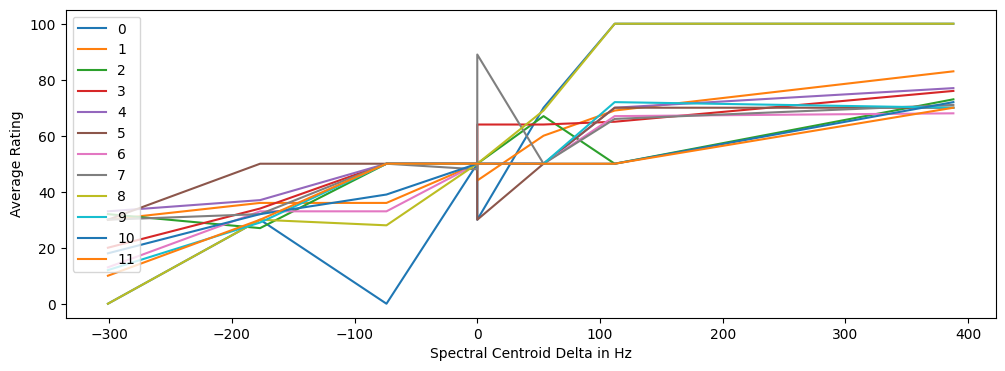

Song Title: Classical_GustavHolst_03_1


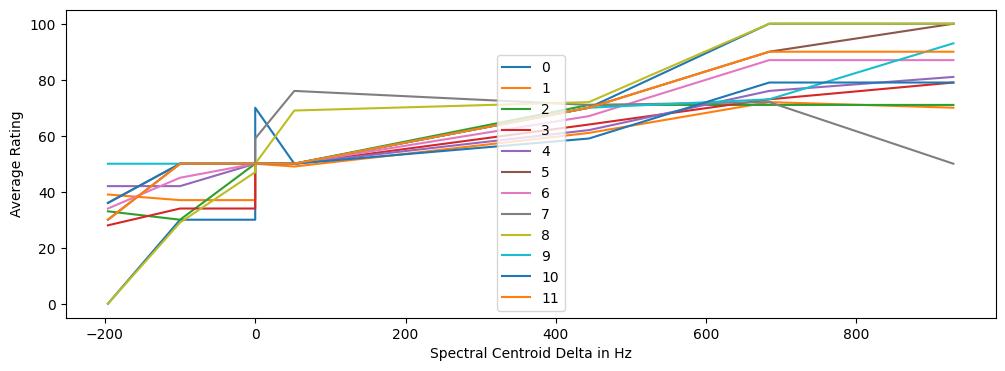

Song Title: Classical_RichardStrauss_1


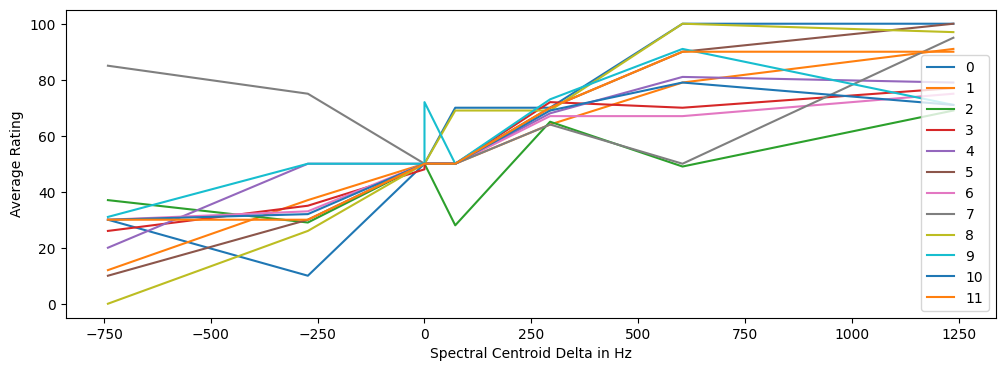

Song Title: Grace_Jones_Snippet_1


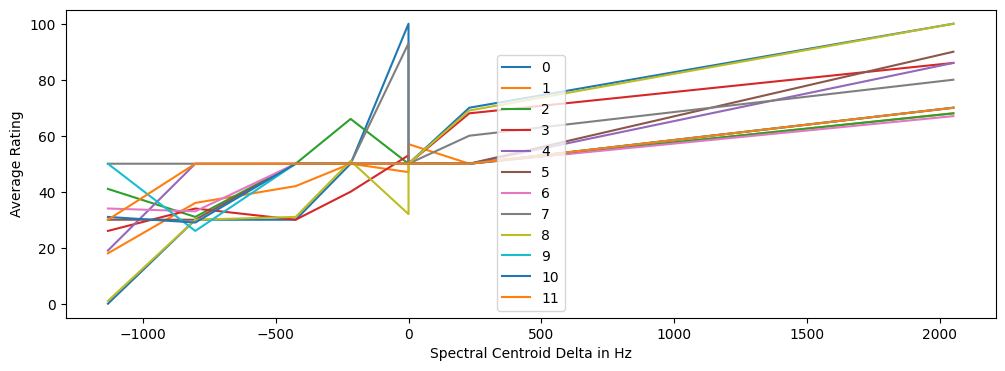

Song Title: HerbieHancock_Snippet_1


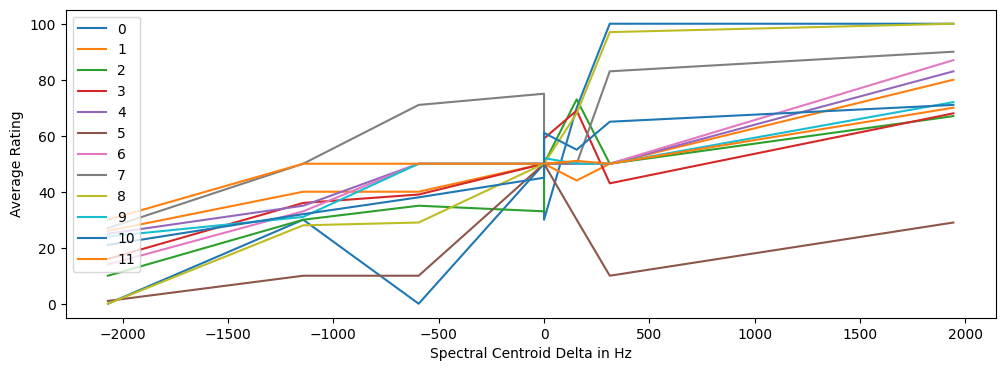

Song Title: Lofi_01_1


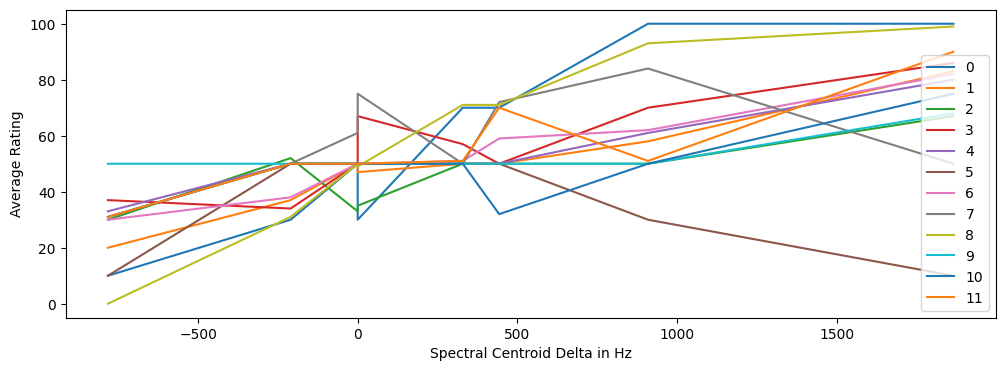

Song Title: Techno_Kaf_01_1


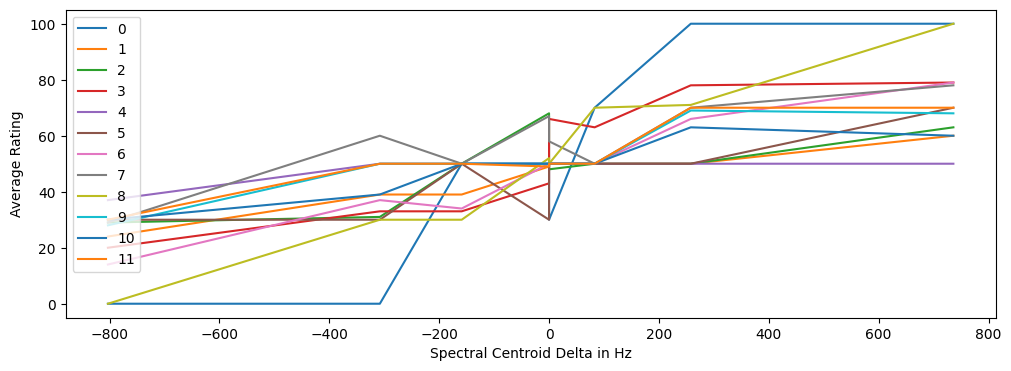

Song Title: Techno_PolarInertia_1


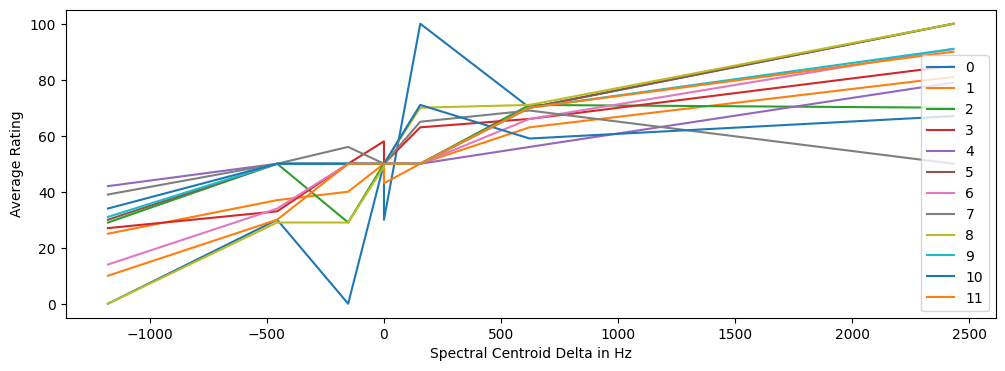

In [29]:
num_participants = 12
for i in range(8):
    plt.figure(figsize = (12,4))
    song_title = df.song[i*8].split('|')[0]
    print('Song Title: {}'.format(song_title))
    df_chunk = df[i*8:(i+1)*8].sort_values(by = 'sc_delta')
    sc_delta = df_chunk['sc_delta']
    df_chunk = df_chunk.drop(columns = ['db', 'sc', 'sc_delta', 'song'])

    for i in range(num_participants):
        plt.plot(sc_delta,df_chunk.iloc[:,i], label = i)
    plt.legend()
    plt.xlabel('Spectral Centroid Delta in Hz')
    plt.ylabel('Average Rating')
    plt.show()

### Interpretation / Thoughts about further analysis

A positive gradient describes a correlation between the brightness perception and the spectral centroid. We could now check for the amount of positive gradients for a song and interpret it as an accuracy. What I see as a problem here: we play every song twice - sometimes there is plenty of songs in between - we cannot really compare the snippets from the first appearance to the second (we would do this when looking at the gradient).

So I decided here to:

- treat the problem as a simple 3 class classification: is a given snippet brighter/less bright/equally bright as the reference?
- Every guess becomes either True or False
- Calculate accuracy as the amount of correct guesses

- Also: I decided to create a threshold for neutral guesses: between 45 and 55 means equally bright as the reference

Let me know what you think!

# Figuring out the JND

In [30]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,db,sc,sc_delta,song
0,30,36,27,34,37,50,33,32,30,29,32,30,-2.00,933,-177,Classical_GustavHolst_01_1|C1
1,100,69,50,65,70,70,67,66,100,72,50,50,1.00,1222,112,Classical_GustavHolst_01_1|C2
2,0,30,32,20,33,30,13,30,0,12,18,10,-4.00,809,-301,Classical_GustavHolst_01_1|C3
3,50,50,50,50,50,50,50,48,50,50,50,50,0.00,1110,0,Classical_GustavHolst_01_1|reference
4,100,83,73,76,77,70,68,71,100,70,72,70,3.00,1498,388,Classical_GustavHolst_01_2|C1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,50,50,50,58,50,50,50,50,49,50,50,50,0.00,5481,0,Techno_PolarInertia_1|reference
60,100,81,70,85,79,100,91,50,100,91,67,90,4.00,7912,2432,Techno_PolarInertia_2|C1
61,70,63,71,66,56,70,66,69,71,70,59,70,1.00,6103,622,Techno_PolarInertia_2|C2
62,0,40,29,50,50,50,50,56,29,50,50,50,-0.25,5327,-153,Techno_PolarInertia_2|C3


In [31]:
def compute_accuracy(dataframe):
    """
    Method computes the accuracy per song of the guesses by comparing the sc_delta and the participant guesses

    Returns a dataframe with a 'song' column and a 'accuracy' column
    """
    acc_list = []
    for i, line in dataframe.iterrows():
        if line.sc_delta < 0:
            accuracy = len([x for x in range(num_participants) if line[x] < 45]) / num_participants
        elif line.sc_delta > 0:
            accuracy = len([x for x in range(num_participants) if line[x] > 55]) / num_participants
        else:
            accuracy = len([x for x in range(num_participants) if 55 >= line[x] >= 45]) / num_participants
        acc_list.append({'song': line.song, 'accuracy': accuracy})
    return pd.DataFrame(acc_list)

### Compute Accuracy for different equalizer changes in db

/var/folders/_x/qvdcsqp97r92fzdmk4t_7wh00000gn/T/ipykernel_10466/2579470116.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  accuracy = len([x for x in range(num_participants) if line[x] < 45]) / num_participants
/var/folders/_x/qvdcsqp97r92fzdmk4t_7wh00000gn/T/ipykernel_10466/2579470116.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  accuracy = len([x for x in range(num_participants) if 55 >= line[x] >= 45]) / num_participants
/var/folders/_x/qvdcsqp97r92fzdmk4t_7wh00000gn/T/ipykernel_10466/2579470116.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, int

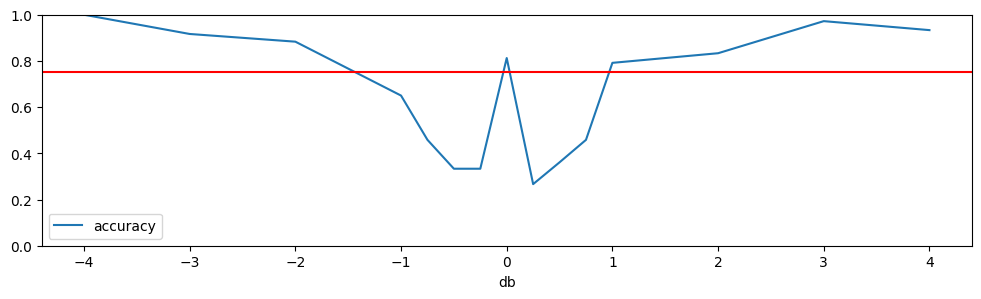

In [33]:
db_values_unique = list(df.db.unique())
db_values_unique.sort()
acc_list = []
for db_value in db_values_unique:
    accuracy_df = compute_accuracy(df[df.db==db_value])
    accuracy = accuracy_df.accuracy.mean()
    acc_list.append({'db': db_value, 'accuracy': accuracy})
    accuracy_df = accuracy_df.rename(columns={'accuracy': 'accuracy_'+ str(db_value)})
   
accuracy_per_db_df = pd.DataFrame(acc_list)

accuracy_per_db_df.plot('db', 'accuracy', figsize = (12,3))
plt.axhline(0.75, color = 'r')
plt.ylim(0,1)
plt.show()

This plot shows the accuracy after grouping the dataframe regarding the db change values. 4db changes seem to almost always change the brightness perception of the subjects. The JND seems to be around -1.2db and +1db (75% of the subjects were able to notice a change in brightness).

### JND for spectral centroid deltas

In [34]:
sc_delta_list= df.sc_delta.unique()
sc_delta_list.sort()
sc_delta_list

array([-2070, -1179, -1143, -1132,  -803,  -782,  -741,  -595,  -456,
        -425,  -308,  -301,  -273,  -218,  -210,  -196,  -177,  -159,
        -153,  -100,   -74,     0,    52,    54,    72,    83,   112,
         155,   229,   258,   294,   312,   329,   388,   443,   444,
         604,   622,   684,   736,   909,   929,  1238,  1865,  1943,
        2052,  2432])

This list contains all the spectral centroid deltas of our survey data. If we plot the accuracy values for the single deltas:

/var/folders/_x/qvdcsqp97r92fzdmk4t_7wh00000gn/T/ipykernel_10466/2579470116.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  accuracy = len([x for x in range(num_participants) if line[x] < 45]) / num_participants
/var/folders/_x/qvdcsqp97r92fzdmk4t_7wh00000gn/T/ipykernel_10466/2579470116.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  accuracy = len([x for x in range(num_participants) if 55 >= line[x] >= 45]) / num_participants
/var/folders/_x/qvdcsqp97r92fzdmk4t_7wh00000gn/T/ipykernel_10466/2579470116.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, int

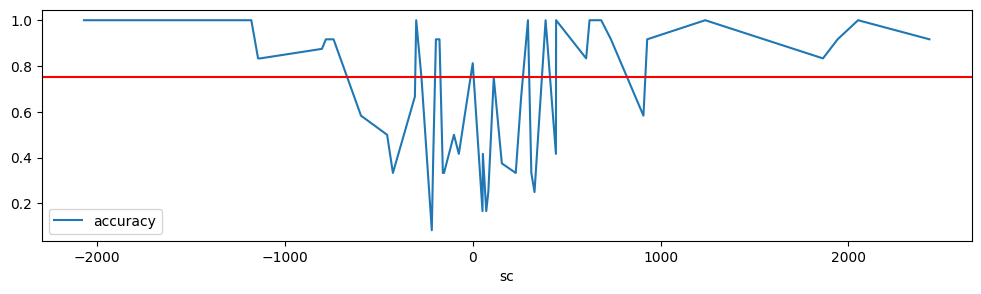

In [35]:
acc_list_sc = []
for sc_value in sc_delta_list:
    accuracy_df = compute_accuracy(df[sc_value == df.sc_delta])
    accuracy = accuracy_df.accuracy.mean()
    acc_list_sc.append({'sc': sc_value, 'accuracy': accuracy})
   
accuracy_per_sc_df = pd.DataFrame(acc_list_sc)
accuracy_per_sc_df.plot('sc', 'accuracy', figsize = (12,3))
plt.axhline(0.75, color = 'r')
plt.show()

the result looks noisy, as almost every snippet has a unique sc_delta. The following code groups the sc_deltas and plots the accuracy:

/var/folders/_x/qvdcsqp97r92fzdmk4t_7wh00000gn/T/ipykernel_10466/2579470116.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  accuracy = len([x for x in range(num_participants) if line[x] < 45]) / num_participants
/var/folders/_x/qvdcsqp97r92fzdmk4t_7wh00000gn/T/ipykernel_10466/2579470116.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  accuracy = len([x for x in range(num_participants) if 55 >= line[x] >= 45]) / num_participants
/var/folders/_x/qvdcsqp97r92fzdmk4t_7wh00000gn/T/ipykernel_10466/2579470116.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, int

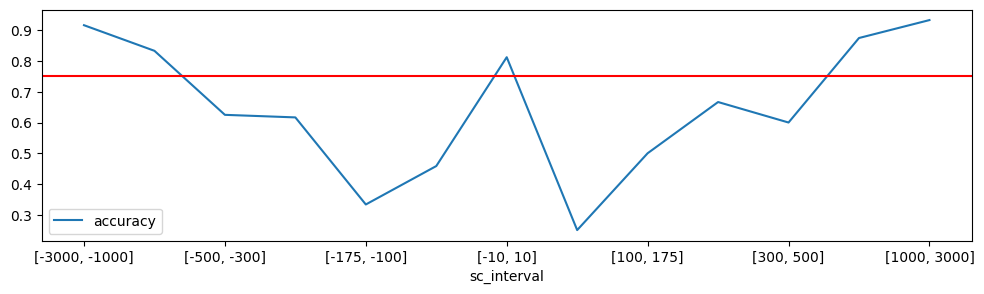

In [39]:
sc_delta_intervals = [[-3000, -1000], [-1000, -500], [-500, -300], [-300, -175], [-175, -100], [-100, -10],[-10, 10], [10, 100], [100, 175], [175, 300], [300, 500], [500, 1000], [1000, 3000]]
acc_list_sc = []
for sc_value in sc_delta_intervals:
    accuracy_df = compute_accuracy(df[(sc_value[0]<=df.sc_delta) & (df.sc_delta < sc_value[1])])
    accuracy = accuracy_df.accuracy.mean()
    acc_list_sc.append({'sc_interval': sc_value, 'accuracy': accuracy})
   
accuracy_per_sc_interval_df = pd.DataFrame(acc_list_sc)
accuracy_per_sc_interval_df.plot('sc_interval', 'accuracy', figsize = (12,3))
plt.axhline(0.75, color = 'r')
plt.show()

The JND regarding our survey seems to be around +-750hz for spectral centroid deltas.

# Accuracy per song

In [40]:
snippet_list = list(df.song.unique())
song_list = set([x.split('|')[0][:-2] for x in snippet_list])
song_list

{'Classical_GustavHolst_01',
 'Classical_GustavHolst_03',
 'Classical_RichardStrauss',
 'Grace_Jones_Snippet',
 'HerbieHancock_Snippet',
 'Lofi_01',
 'Techno_Kaf_01',
 'Techno_PolarInertia'}

In [41]:
acc_list_song = []
for song in song_list:
    accuracy_df = compute_accuracy(df[df.song.str.startswith(song)])
    accuracy = accuracy_df.accuracy.mean()
    acc_list_song.append({'name': song, 'accuracy': accuracy})
   
accuracy_per_song_df = pd.DataFrame(acc_list_song).sort_values(by='accuracy').reset_index(drop=True)

/var/folders/_x/qvdcsqp97r92fzdmk4t_7wh00000gn/T/ipykernel_10466/2579470116.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  accuracy = len([x for x in range(num_participants) if line[x] > 55]) / num_participants
/var/folders/_x/qvdcsqp97r92fzdmk4t_7wh00000gn/T/ipykernel_10466/2579470116.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  accuracy = len([x for x in range(num_participants) if 55 >= line[x] >= 45]) / num_participants
/var/folders/_x/qvdcsqp97r92fzdmk4t_7wh00000gn/T/ipykernel_10466/2579470116.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, int

In [42]:
accuracy_per_song_df

,name,accuracy
0,Lofi_01,0.614583
1,Grace_Jones_Snippet,0.625000
2,Techno_Kaf_01,0.656250
3,HerbieHancock_Snippet,0.697917
4,Techno_PolarInertia,0.739583
5,Classical_GustavHolst_03,0.760417
6,Classical_GustavHolst_01,0.760417
7,Classical_RichardStrauss,0.822917


In [43]:
accuracy_per_song_df.accuracy.mean()

0.7096354166666667

The result is quite interesting: The accuracy is a lot higher for some songs - here we can only make assumptions. Maybe the Richard Strauss snippet e.g. has a more known texture/build up/overall sound than Lofi_01.

### Impact of the reference for the accuracy computation
I'm repeating the same accuracy computation without the reference - it was originally only planed to use the reference as a sanity check - it shouldn't be considered for the accuracy of the songs (before it didnt matter as the results where plotted regarding sc_delta etc).

In [44]:
acc_list_song = []
for song in song_list:
    df_chunk = df[df.db != 0]
    accuracy_df = compute_accuracy(df_chunk[df_chunk.song.str.startswith(song)])
    accuracy = accuracy_df.accuracy.mean()
    acc_list_song.append({'name': song, 'accuracy': accuracy})
   
accuracy_per_song_df_no_ref = pd.DataFrame(acc_list_song).sort_values(by='accuracy').reset_index(drop=True)

/var/folders/_x/qvdcsqp97r92fzdmk4t_7wh00000gn/T/ipykernel_10466/2579470116.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  accuracy = len([x for x in range(num_participants) if line[x] > 55]) / num_participants
/var/folders/_x/qvdcsqp97r92fzdmk4t_7wh00000gn/T/ipykernel_10466/2579470116.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  accuracy = len([x for x in range(num_participants) if line[x] < 45]) / num_participants


#### Accuracy of the songs without reference

In [45]:
accuracy_per_song_df_no_ref

,name,accuracy
0,Grace_Jones_Snippet,0.555556
1,Lofi_01,0.569444
2,Techno_Kaf_01,0.638889
3,HerbieHancock_Snippet,0.666667
4,Techno_PolarInertia,0.694444
5,Classical_GustavHolst_03,0.750000
6,Classical_GustavHolst_01,0.750000
7,Classical_RichardStrauss,0.777778


In [46]:
accuracy_per_song_df_no_ref.accuracy.mean()

0.6753472222222222

The results are a little lower, as expected. Also now all the classical pieces show the highest accuracy.

#### Accuracy of the sanity check (reference snippets)

In [47]:
acc_list_song = []
for song in song_list:
    df_chunk = df[df.db == 0]
    accuracy_df = compute_accuracy(df_chunk[df_chunk.song.str.startswith(song)])
    accuracy = accuracy_df.accuracy.mean()
    acc_list_song.append({'name': song, 'accuracy': accuracy})
   
accuracy_per_song_ref_only = pd.DataFrame(acc_list_song).sort_values(by='accuracy').reset_index(drop=True)
accuracy_per_song_ref_only

/var/folders/_x/qvdcsqp97r92fzdmk4t_7wh00000gn/T/ipykernel_10466/2579470116.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  accuracy = len([x for x in range(num_participants) if 55 >= line[x] >= 45]) / num_participants


,name,accuracy
0,Techno_Kaf_01,0.708333
1,Lofi_01,0.750000
2,Classical_GustavHolst_03,0.791667
3,HerbieHancock_Snippet,0.791667
4,Classical_GustavHolst_01,0.791667
5,Grace_Jones_Snippet,0.833333
6,Techno_PolarInertia,0.875000
7,Classical_RichardStrauss,0.958333


Maybe we should skip this point ;) 

The only explanation I'd have here could be reasons like exhaustion of the subjects (test to long) or a missleading selection of the samples per page - what do you think?

# Analysis of the participants - checking for outliers etc

In [48]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,db,sc,sc_delta,song
0,30,36,27,34,37,50,33,32,30,29,32,30,-2.00,933,-177,Classical_GustavHolst_01_1|C1
1,100,69,50,65,70,70,67,66,100,72,50,50,1.00,1222,112,Classical_GustavHolst_01_1|C2
2,0,30,32,20,33,30,13,30,0,12,18,10,-4.00,809,-301,Classical_GustavHolst_01_1|C3
3,50,50,50,50,50,50,50,48,50,50,50,50,0.00,1110,0,Classical_GustavHolst_01_1|reference
4,100,83,73,76,77,70,68,71,100,70,72,70,3.00,1498,388,Classical_GustavHolst_01_2|C1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,50,50,50,58,50,50,50,50,49,50,50,50,0.00,5481,0,Techno_PolarInertia_1|reference
60,100,81,70,85,79,100,91,50,100,91,67,90,4.00,7912,2432,Techno_PolarInertia_2|C1
61,70,63,71,66,56,70,66,69,71,70,59,70,1.00,6103,622,Techno_PolarInertia_2|C2
62,0,40,29,50,50,50,50,56,29,50,50,50,-0.25,5327,-153,Techno_PolarInertia_2|C3


### Computing the accuracy per subject

In [49]:
def compute_accuracy_one_participant(dataframe, subject_num):
    acc_list = []
    for i, line in dataframe.iterrows():
        if line.sc_delta < 0:
            if line[subject_num] < 45:
                accuracy = 1
            else:
                accuracy = 0
        elif line.sc_delta > 0:
            if line[subject_num] > 55:
                accuracy = 1
            else:
                accuracy = 0
        else:
            if 45 < line[subject_num] < 55:
                accuracy = 1
            else:
                accuracy = 0
        acc_list.append({'song': line.song, 'accuracy': accuracy})
    return pd.DataFrame(acc_list)

In [50]:
acc_list_subjects = []
for i in range(num_participants):
    accuracy_df = compute_accuracy_one_participant(df, subject_num=i)
    accuracy = accuracy_df.accuracy.mean()
    acc_list_subjects.append({'name': i, 'accuracy': accuracy})
   
accuracy_per_subject = pd.DataFrame(acc_list_subjects).sort_values(by='accuracy')
accuracy_per_subject

/var/folders/_x/qvdcsqp97r92fzdmk4t_7wh00000gn/T/ipykernel_10466/1410447572.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if line[subject_num] < 45:
/var/folders/_x/qvdcsqp97r92fzdmk4t_7wh00000gn/T/ipykernel_10466/1410447572.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if line[subject_num] > 55:
/var/folders/_x/qvdcsqp97r92fzdmk4t_7wh00000gn/T/ipykernel_10466/1410447572.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]

,name,accuracy
7,7,0.500000
9,9,0.593750
5,5,0.609375
4,4,0.640625
2,2,0.656250
11,11,0.656250
10,10,0.703125
1,1,0.765625
6,6,0.781250
3,3,0.796875


There is a high variance in the brightness perception of the subjects. No subject seemed to be guessing (at least not the whole test), as we have 3 classes and the lowest accuracy is 50%.

In [51]:
accuracy_per_subject.accuracy.mean()

0.7083333333333334